In [1]:
# all imported goods
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('data_reply_and_user.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129263 entries, 0 to 129262
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Hate_author                129263 non-null  object 
 1   Subreddit                  129263 non-null  object 
 2   Submission                 129263 non-null  object 
 3   Hate_body                  129263 non-null  object 
 4   Hate_time                  129263 non-null  int64  
 5   Hate_ID                    129263 non-null  object 
 6   author_comment_karma       74806 non-null   float64
 7   log_author_comment_karma   73663 non-null   float64
 8   author_link_karma          74806 non-null   float64
 9   log_author_link_karma      74806 non-null   float64
 10  author_create_date         74806 non-null   object 
 11  author_age_of_account      74806 non-null   float64
 12  author_create_utc          74806 non-null   float64
 13  author_mod                 74

In [ ]:
#extract hate posters
hate = df.iloc[:,[0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 43]]
hate = hate.dropna(subset = ['author_comment_karma'])
hate = hate.drop_duplicates(subset=['Hate_author'])
hate = hate.set_index('Hate_author')
hate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21183 entries, bizarrogreg to rixtertrixter
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author_comment_karma      21183 non-null  float64
 1   log_author_comment_karma  20865 non-null  float64
 2   author_link_karma         21183 non-null  float64
 3   log_author_link_karma     21183 non-null  float64
 4   author_create_date        21183 non-null  object 
 5   author_age_of_account     21183 non-null  float64
 6   author_create_utc         21183 non-null  float64
 7   author_mod                21183 non-null  object 
 8   author_mod_subreddits     21183 non-null  object 
 9   author_trophies           21183 non-null  object 
 10  author_Email_verified     21183 non-null  object 
 11  author_Year_Club          20967 non-null  float64
 12  author_Gilde              3655 non-null   float64
 13  author_Awards_Club        21183 non-null  object

In [ ]:
#extract reply posters
reply = df.iloc[:,[24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43]]
reply = reply.dropna(subset = ['replier_comment_karma'])
reply = reply.drop_duplicates(subset=['Reply_author'])
#reply = reply.drop_duplicates()
print(reply['Reply_author'].value_counts())
reply = reply.set_index('Reply_author')
reply.info()

Reply_author
Erecktus              1
Sirhugs               1
Jduf1976              1
mattedmanatee         1
fakeittillumakeit0    1
                     ..
OneCollar4            1
mikesum32             1
Whatever748           1
ergovisavis           1
LordQuagga            1
Name: count, Length: 27483, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 27483 entries, Erecktus to LordQuagga
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   replier_comment_karma      27483 non-null  float64
 1   log_replier_comment_karma  27161 non-null  float64
 2   replier_link_karma         27483 non-null  float64
 3   log_replier_link_karma     27483 non-null  float64
 4   replier_create_utc         27483 non-null  float64
 5   replier_create_date        27483 non-null  object 
 6   replier_age_of_account     27483 non-null  float64
 7   replier_mod                27483 non-null  object 
 8   r

In [ ]:
#checking for authors that post both replies and hate?
h2 = hate.reset_index()
h2 = h2.rename(columns={'Hate_author':'author'})
r2 = reply.reset_index()
r2 = r2.rename(columns={'Reply_author':'author'})
cross = pd.merge(h2,r2,on='author')
cross = cross.drop(["replier_comment_karma", 'log_replier_comment_karma', 'replier_link_karma', 'log_replier_link_karma',
            'replier_create_utc', 'replier_create_date', 'replier_age_of_account', 'replier_mod', 'replier_mod_subreddits',
            'replier_trophies', 'replier_Email_verified', 'replier_Year_Club', 'replier_Gilde', 'replier_Awards_Club',
            'replier_Not_Forgotten', 'replier_Reddit_Premium'], axis=1)
cross = cross.set_index('author')
cross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12886 entries, bizarrogreg to rixtertrixter
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author_comment_karma      12886 non-null  float64
 1   log_author_comment_karma  12700 non-null  float64
 2   author_link_karma         12886 non-null  float64
 3   log_author_link_karma     12886 non-null  float64
 4   author_create_date        12886 non-null  object 
 5   author_age_of_account     12886 non-null  float64
 6   author_create_utc         12886 non-null  float64
 7   author_mod                12886 non-null  object 
 8   author_mod_subreddits     12886 non-null  object 
 9   author_trophies           12886 non-null  object 
 10  author_Email_verified     12886 non-null  object 
 11  author_Year_Club          12752 non-null  float64
 12  author_Gilde              2358 non-null   float64
 13  author_Awards_Club        12886 non-null  object

In [ ]:
list = (cross.reset_index())['author'].to_numpy().tolist()
hate = hate.drop(list, axis=0)
reply = reply.drop(list, axis=0)

In [ ]:
print(len(list))
hate.info()
reply.info()

12886
<class 'pandas.core.frame.DataFrame'>
Index: 8297 entries, Aq8knyus to diladusta
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author_comment_karma      8297 non-null   float64
 1   log_author_comment_karma  8165 non-null   float64
 2   author_link_karma         8297 non-null   float64
 3   log_author_link_karma     8297 non-null   float64
 4   author_create_date        8297 non-null   object 
 5   author_age_of_account     8297 non-null   float64
 6   author_create_utc         8297 non-null   float64
 7   author_mod                8297 non-null   object 
 8   author_mod_subreddits     8297 non-null   object 
 9   author_trophies           8297 non-null   object 
 10  author_Email_verified     8297 non-null   object 
 11  author_Year_Club          8215 non-null   float64
 12  author_Gilde              1297 non-null   float64
 13  author_Awards_Club        8297 non-null   object 


In [ ]:
#reddit premium
rp1 = hate['author_Reddit_Premium'].value_counts().to_numpy().tolist()
rp2 = reply['replier_Reddit_Premium'].value_counts().to_numpy().tolist()
rp3 = cross['author_Reddit_Premium'].value_counts().to_numpy().tolist()
rp = pd.DataFrame({'hate':rp1, 'reply':rp2, 'both':rp3}, index=['No','Yes'],dtype='float64')
print('number of users with reddit premium')
print(rp)
rpp = rp
rpp['hate'] = rpp['hate']/8297 * 100
rpp['reply'] = rpp['reply']/14597 * 100
rpp['both'] = rpp['both']/12886 * 100
print('percentage of users with reddit premium')
print(rpp)

number of users with reddit premium
       hate    reply     both
No   8134.0  14271.0  12523.0
Yes   163.0    326.0    363.0
percentage of users with reddit premium
          hate      reply       both
No   98.035434  97.766664  97.182989
Yes   1.964566   2.233336   2.817011


In [ ]:
#mod
m1 = hate['author_mod'].value_counts().to_numpy().tolist()
m2 = reply['replier_mod'].value_counts().to_numpy().tolist()
m3 = cross['author_mod'].value_counts().to_numpy().tolist()
m = pd.DataFrame({'hate':m1, 'reply':m2, 'both':m3}, index=['No','Yes'],dtype='float64')
print('number of users that are moderators')
print(m)
mp = m
mp['hate'] = mp['hate']/8297 * 100
mp['reply'] = mp['reply']/14597 * 100
mp['both'] = mp['both']/12886 * 100
print('percentage of users that are moderators')
print(mp)

number of users that are moderators
       hate    reply    both
No   6558.0  11328.0  9615.0
Yes  1739.0   3269.0  3271.0
percentage of users that are moderators
          hate      reply       both
No   79.040617  77.604987  74.615862
Yes  20.959383  22.395013  25.384138


In [ ]:
#verified email
ev1 = hate['author_Email_verified'].value_counts().to_numpy().tolist()
ev2 = reply['replier_Email_verified'].value_counts().to_numpy().tolist()
ev3 = cross['author_Email_verified'].value_counts().to_numpy().tolist()
ev = pd.DataFrame({'hate':ev1, 'reply':ev2, 'both':ev3}, index=['No','Yes'],dtype='float64')
print('number of users with verified email')
print(ev)
evp = ev
evp['hate'] = evp['hate']/8297 * 100
evp['reply'] = evp['reply']/14597 * 100
evp['both'] = evp['both']/12886 * 100
print('percentage of users with verified email')
print(evp)

number of users with verified email
       hate    reply    both
No   6501.0  11524.0  9971.0
Yes  1796.0   3073.0  2915.0
percentage of users with verified email
          hate      reply      both
No   78.353622  78.947729  77.37855
Yes  21.646378  21.052271  22.62145


In [ ]:
#awards club
ac1 = hate['author_Awards_Club'].value_counts().to_numpy().tolist()
ac2 = reply['replier_Awards_Club'].value_counts().to_numpy().tolist()
ac3 = cross['author_Awards_Club'].value_counts().to_numpy().tolist()
ac = pd.DataFrame({'hate':ac1, 'reply':ac2, 'both':ac3}, index=['No','Yes'],dtype='float64')
print('number of users with awards club')
print(ac)
acp = ac
acp['hate'] = acp['hate']/8297 * 100
acp['reply'] = acp['reply']/14597 * 100
acp['both'] = acp['both']/12886 * 100
print('percentage of users with awards club')
print(acp)

number of users with awards club
       hate    reply     both
No   8167.0  14346.0  12612.0
Yes   130.0    251.0    274.0
percentage of users with awards club
          hate      reply       both
No   98.433169  98.280469  97.873661
Yes   1.566831   1.719531   2.126339


In [ ]:
#not forgotten
nf1 = hate['author_Not_Forgotten'].value_counts().to_numpy().tolist()
nf2 = reply['replier_Not_Forgotten'].value_counts().to_numpy().tolist()
nf3 = cross['author_Not_Forgotten'].value_counts().to_numpy().tolist()
nf = pd.DataFrame({'hate':nf1, 'reply':nf2, 'both':nf3}, index=['No','Yes'],dtype='float64')
print('number of users with not forgotten')
print(nf)
nfp = nf
nfp['hate'] = nfp['hate']/8297 * 100
nfp['reply'] = nfp['reply']/14597 * 100
nfp['both'] = nfp['both']/12886 * 100
print('percentage of users with not forgotten')
print(nfp)

number of users with not forgotten
       hate    reply     both
No   7785.0  13679.0  12220.0
Yes   512.0    918.0    666.0
percentage of users with not forgotten
          hate      reply     both
No   93.829095  93.711037  94.8316
Yes   6.170905   6.288963   5.1684


In [ ]:
hg = hate['author_Gilde'].value_counts().to_numpy().tolist()
rg = reply['replier_Gilde'].value_counts().to_numpy().tolist()
bg = cross['author_Gilde'].value_counts().to_numpy().tolist()
bg.append(0)
g = pd.DataFrame({'hate':hg, 'reply':rg, 'both': bg}, index=[1, 4, 5, 7, 6, 10], dtype='float64')
g = g.reindex([1, 4, 5, 6, 7, 10])
print('number of users with gilde')
print(g)
gp = g
gp['hate'] = gp['hate']/8297 * 100
gp['reply'] = gp['reply']/14597 * 100
gp['both'] = gp['both']/12886 * 100
print('percentage of users with gilde')
print(gp)

number of users with gilde
      hate   reply    both
1   1173.0  2189.0  2086.0
4     69.0   128.0   138.0
5     33.0    84.0    84.0
6      3.0    15.0    14.0
7     18.0    46.0    36.0
10     1.0     2.0     0.0
percentage of users with gilde
         hate      reply       both
1   14.137640  14.996232  16.188111
4    0.831626   0.876893   1.070930
5    0.397734   0.575461   0.651870
6    0.036158   0.102761   0.108645
7    0.216946   0.315133   0.279373
10   0.012053   0.013701   0.000000


In [ ]:
yc1 = hate['author_Year_Club'].value_counts().reindex([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                                       7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
                                                       13.0, 14.0, 15.0]).to_numpy().tolist()
yc2 = reply['replier_Year_Club'].value_counts().reindex([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                                       7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
                                                       13.0, 14.0, 15.0]).to_numpy().tolist()
yc3 = cross['author_Year_Club'].value_counts().reindex([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                                       7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
                                                       13.0, 14.0, 15.0]).to_numpy().tolist()
yc = pd.DataFrame({'hate':yc1, 'reply':yc2, 'both':yc3}, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],dtype='float64')
print('number of users with years-club')
print(yc)
ycp = yc
ycp['hate'] = ycp['hate']/8297 * 100
ycp['reply'] = ycp['reply']/14597 * 100
ycp['both'] = ycp['both']/12886 * 100
print('percentage of users with years-club')
print(ycp)

number of users with years-club
      hate   reply    both
1   1304.0  1924.0  1907.0
2   1161.0  1907.0  1758.0
3   1151.0  1784.0  1656.0
4    772.0  1406.0  1203.0
5    714.0  1293.0  1069.0
6    602.0  1063.0   852.0
7    539.0  1031.0   898.0
8    487.0  1061.0   825.0
9    526.0  1032.0   899.0
10   534.0  1030.0   867.0
11   259.0   575.0   466.0
12    74.0   173.0   159.0
13    40.0    72.0    87.0
14    28.0    68.0    70.0
15    24.0    52.0    36.0
percentage of users with years-club
         hate      reply       both
1   15.716524  13.180791  14.799007
2   13.993010  13.064328  13.642713
3   13.872484  12.221689  12.851156
4    9.304568   9.632116   9.335713
5    8.605520   8.857985   8.295825
6    7.255635   7.282318   6.611827
7    6.496324   7.063095   6.968803
8    5.869591   7.268617   6.402297
9    6.339641   7.069946   6.976564
10   6.436061   7.056244   6.728232
11   3.121610   3.939166   3.616328
12   0.891889   1.185175   1.233897
13   0.482102   0.493252   0.675

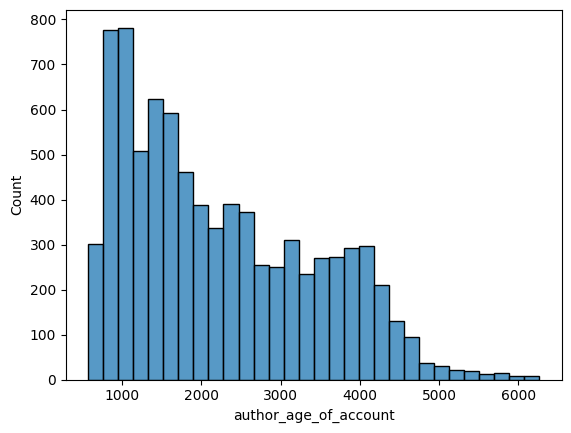

In [ ]:
sns.histplot(hate['author_age_of_account'])
plt.show()

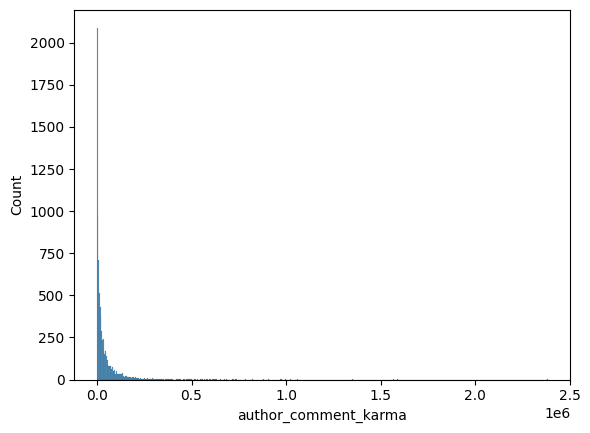

In [ ]:
sns.histplot(hate['author_comment_karma'])
plt.show()

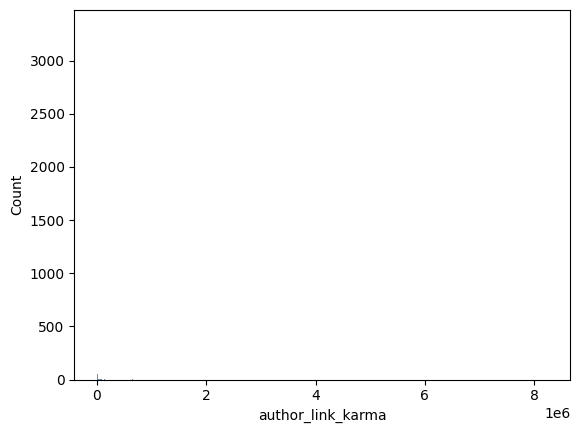

In [ ]:
sns.histplot(hate['author_link_karma'])
plt.show()


In [ ]:
stats.mannwhitneyu(hate['author_age_of_account'], reply['replier_age_of_account'])

MannwhitneyuResult(statistic=56567579.0, pvalue=1.0728596742098254e-16)

In [ ]:
stats.mannwhitneyu(hate['author_comment_karma'], reply['replier_comment_karma'])

MannwhitneyuResult(statistic=57314713.0, pvalue=1.5604866679852867e-11)

In [ ]:
stats.mannwhitneyu(hate['author_link_karma'], reply['replier_link_karma'])

MannwhitneyuResult(statistic=59065683.0, pvalue=0.0019329240800711137)

Text(0.5, 0, 'Age')

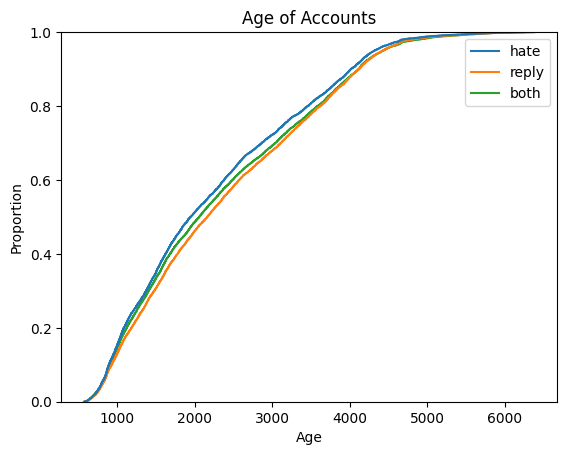

In [ ]:
#age of account plot
ar1 = hate['author_age_of_account'].to_numpy().tolist()
ar2 = reply['replier_age_of_account'].to_numpy().tolist()
ar3 = cross['author_age_of_account'].to_numpy().tolist()
ecdfD = {'hate': ar1, 'reply': ar2, 'both': ar3}
sns.ecdfplot(data=ecdfD)
plt.title('Age of Accounts')
plt.xlabel('Age')

Text(0.5, 0, 'Comment Karma')

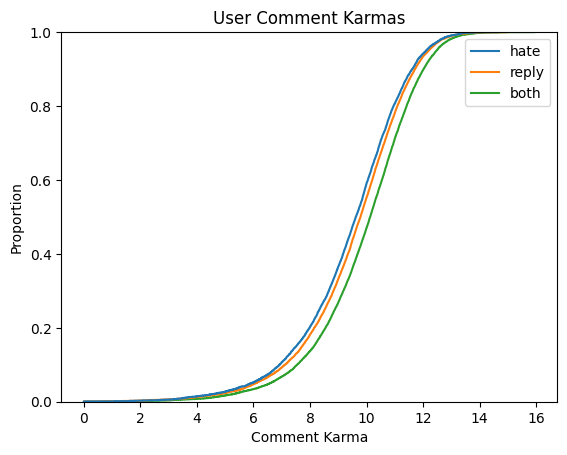

In [ ]:
#age of account plot
ar1 = hate['log_author_comment_karma'].to_numpy().tolist()
ar2 = reply['log_replier_comment_karma'].to_numpy().tolist()
ar3 = cross['log_author_comment_karma'].to_numpy().tolist()
ecdfD = {'hate': ar1, 'reply': ar2, 'both': ar3}
sns.ecdfplot(data=ecdfD)
plt.title('User Comment Karmas')
plt.xlabel('Comment Karma')

Text(0.5, 0, 'Link Karma')

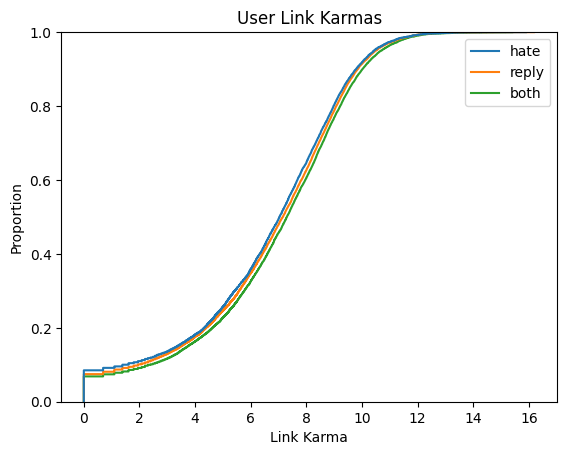

In [ ]:
#age of account plot
ar1 = hate['log_author_link_karma'].to_numpy().tolist()
ar2 = reply['log_replier_link_karma'].to_numpy().tolist()
ar3 = cross['log_author_link_karma'].to_numpy().tolist()
ecdfD = {'hate': ar1, 'reply': ar2, 'both': ar3}
sns.ecdfplot(data=ecdfD)
plt.title('User Link Karmas')
plt.xlabel('Link Karma')

In [ ]:
hate.to_csv("hate_without_overlap.csv")
reply.to_csv("reply_without_overlap.csv")

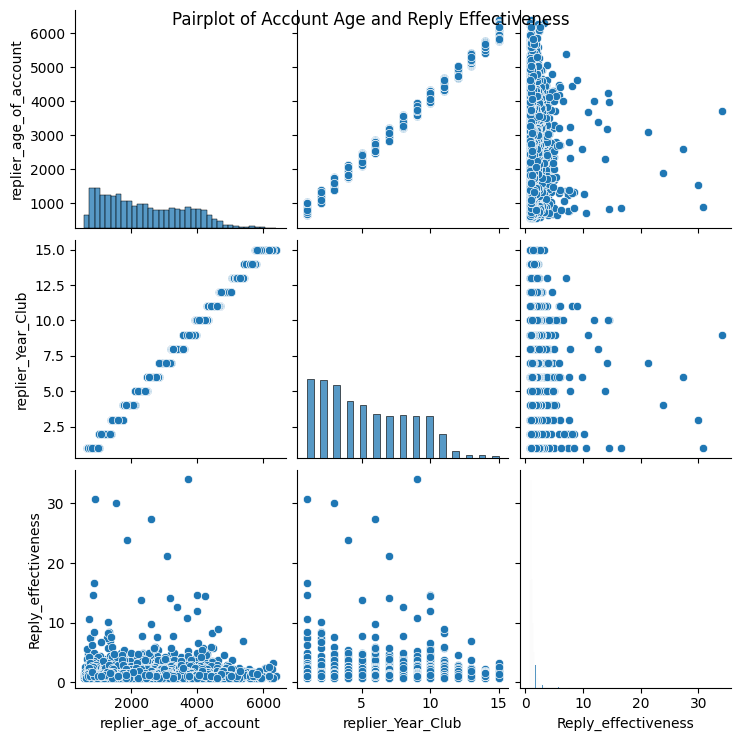

In [ ]:
#trying to do some more plots
# Extract relevant columns for replyId author info and conversation outcome
reply = reply.reset_index()
reply_info = reply[['Reply_author','replier_Year_Club', 'Reply_effectiveness', 'log_replier_link_karma', 'log_replier_comment_karma', 'replier_age_of_account']]
# Group by author and calculate sum of reply total, sum of hate total, and average effectiveness
reply_info_grouped = reply_info.groupby('Reply_author').agg({'replier_Year_Club': 'mean', 'Reply_effectiveness': 'mean', 'log_replier_link_karma': 'mean',
'log_replier_comment_karma': 'mean', 'replier_age_of_account': 'mean'})
reply_info_grouped.reset_index(inplace=True)  # Reset index to convert group labels back to columns

#print(reply_info_grouped['Reply_effectiveness'].value_counts())
sns.pairplot(data=reply_info_grouped, vars=['replier_age_of_account', 'replier_Year_Club', 'Reply_effectiveness'])
plt.suptitle('Pairplot of Account Age and Reply Effectiveness')
plt.show()

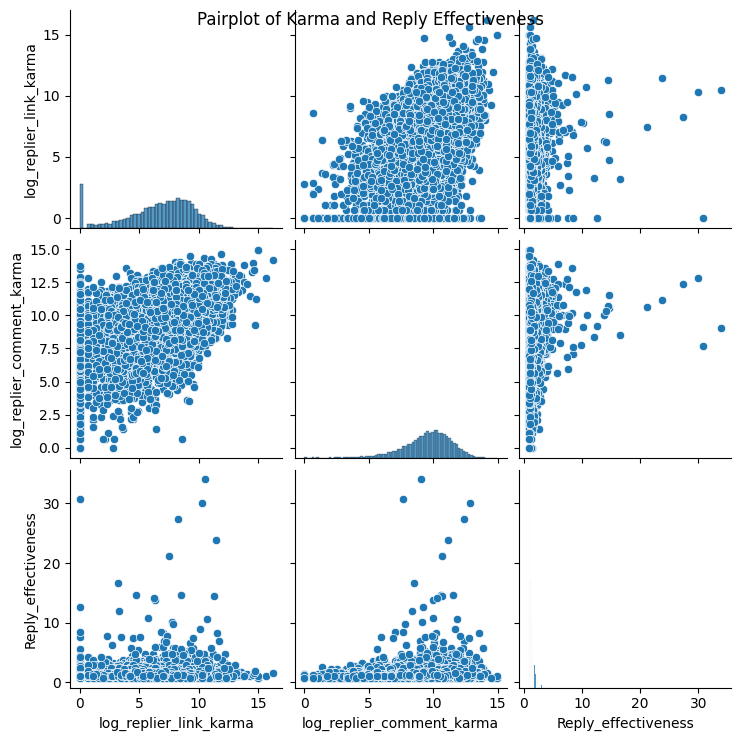

In [ ]:
sns.pairplot(data=reply_info_grouped, vars=['log_replier_link_karma', 'log_replier_comment_karma', 'Reply_effectiveness'])
plt.suptitle('Pairplot of Karma and Reply Effectiveness')
plt.show()

In [ ]:
reply_info_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14597 entries, 0 to 14596
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reply_author               14597 non-null  object 
 1   replier_Year_Club          14471 non-null  float64
 2   Reply_effectiveness        14597 non-null  float64
 3   log_replier_link_karma     14597 non-null  float64
 4   log_replier_comment_karma  14461 non-null  float64
 5   replier_age_of_account     14597 non-null  float64
dtypes: float64(5), object(1)
memory usage: 684.4+ KB
